In [1]:
import pandas as pd
from collections import namedtuple
import os  
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import codecs 
import json 
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from gensim.models import Word2Vec

In [46]:
from sklearn.preprocessing import LabelEncoder
from keras.layers import Activation, Dense


In [3]:
i = 0
os.chdir("/home/chinesh/Desktop/Internship/Input_output_data")
for fn in os.listdir('.'):
    if os.path.isfile(fn):
        df = pd.read_pickle(fn)
        if i==0:
            data = pd.DataFrame(df[0]) 
            #print (fn)
            i=1
        else:
            data = data.append(df[0],ignore_index=True)
             #print (fn)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,234378,247.400000,27.058,p1,nimbussanl,#000000,14.0,0,True,True,False,False,False,False,False,False
1,234378,293.539231,27.058,p1,nimbussanl,#000000,14.0,0,True,True,False,False,False,False,False,False
2,71195,376.700000,54.470,p1,nimbussanl,#000000,10.0,0,True,False,False,False,False,False,False,False
3,201816,395.973846,54.470,p1,nimbussanl,#000000,10.0,0,False,False,False,False,False,False,False,False
4,166593,406.110769,54.470,p1,nimbussanl,#000000,10.0,0,True,True,False,False,False,False,False,False


In [4]:
i = 0
os.chdir("/home/chinesh/Desktop/Internship/Input_output_data")
for fn in os.listdir('.'):
    if os.path.isfile(fn):
        df = pd.read_pickle(fn)
        if i==0:
            output = pd.DataFrame(df[1]) 
            
            #print (fn)
            i=1
        else:
            output = output.append(df[1],ignore_index=True)
output.head()

,0
0,1
1,0
2,0
3,0
4,0


In [5]:
os.chdir("/home/chinesh/Desktop/Internship")

In [6]:
data = pd.concat([data,output],axis=1)
column_names = ["Word ID","X","Y","Page ID","Font Style","Color","size","bold","an uppercse","all uppercase","single digit","multiple digit","special character","email","hperlink","calender month","output"]
data.columns = column_names
data.head(20)

,Word ID,X,Y,Page ID,Font Style,Color,size,bold,an uppercse,all uppercase,single digit,multiple digit,special character,email,hperlink,calender month,output
0,234378,247.400000,27.058,p1,nimbussanl,#000000,14.0,0,True,True,False,False,False,False,False,False,1
1,234378,293.539231,27.058,p1,nimbussanl,#000000,14.0,0,True,True,False,False,False,False,False,False,0
2,71195,376.700000,54.470,p1,nimbussanl,#000000,10.0,0,True,False,False,False,False,False,False,False,0
3,201816,395.973846,54.470,p1,nimbussanl,#000000,10.0,0,False,False,False,False,False,False,False,False,0
4,166593,406.110769,54.470,p1,nimbussanl,#000000,10.0,0,True,True,False,False,False,False,False,False,0
5,234378,411.679231,54.470,p1,nimbussanl,#000000,10.0,0,False,False,True,True,True,False,False,False,0
6,234378,376.700000,66.870,p1,nimbussanl,#000000,10.0,0,True,False,False,False,False,False,False,False,0
7,234378,406.711579,66.870,p1,nimbussanl,#000000,10.0,0,True,False,False,False,False,False,False,False,0
8,27780,456.064211,66.870,p1,nimbussanl,#000000,10.0,0,True,True,False,False,False,False,False,False,0
9,234378,460.899474,66.870,p1,nimbussanl,#000000,10.0,0,False,False,False,False,False,False,False,False,0


In [7]:
with codecs.open('nltk_words.vocab', 'r', encoding="UTF‐8") as f: 
    word2id = json.load(f)

word_id = data.as_matrix(columns=data.columns[0:1])
inv_map = {v: k for k, v in word2id.iteritems()}
value = inv_map.get(0)
len(inv_map)

234377

In [8]:
for i in range(len(word_id)):
    a = int(word_id[i])
    value = inv_map.get(a)
    if value==None:
        inv_map[int(word_id[i])] = '<UNK>'
        

In [9]:
stop = set(stopwords.words('english'))
stop_words = []
for key, value in inv_map.iteritems():
    if value in stop:
        stop_words.append(key)

In [10]:
len(stop_words)

134

In [11]:
data = data.set_index('Word ID')
data.index.values

array([234378, 234378,  71195, ..., 234378, 234378, 201816])

In [12]:
data_l = data.drop(stop_words)
data = data.reset_index()

In [13]:
data_l = data_l.reset_index()
data_l.size

1492838

In [14]:
data_l.head(5)

,Word ID,X,Y,Page ID,Font Style,Color,size,bold,an uppercse,all uppercase,single digit,multiple digit,special character,email,hperlink,calender month,output
0,234378,247.400000,27.058,p1,nimbussanl,#000000,14.0,0,True,True,False,False,False,False,False,False,1
1,234378,293.539231,27.058,p1,nimbussanl,#000000,14.0,0,True,True,False,False,False,False,False,False,0
2,71195,376.700000,54.470,p1,nimbussanl,#000000,10.0,0,True,False,False,False,False,False,False,False,0
3,234378,411.679231,54.470,p1,nimbussanl,#000000,10.0,0,False,False,True,True,True,False,False,False,0
4,234378,376.700000,66.870,p1,nimbussanl,#000000,10.0,0,True,False,False,False,False,False,False,False,0


In [15]:
word_id = data_l.as_matrix(columns=data.columns[0:1])
sentence = []
for i in range(len(word_id)):
    sentence.append(str(inv_map[int(word_id[i])]))
sentence[0:10]    

['<UNK>',
 '<UNK>',
 'flat',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 'b',
 '<UNK>',
 'g',
 '<UNK>']

In [16]:
output = data_l.as_matrix(columns=data_l.columns[16:17])
print (output[0:10])

[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [17]:
def generate_ngrams(text, n):
    words = text.split()
    output = []  
    for i in range(len(words)-n+1):
        output.append(words[i:i+n])
    return output

In [18]:
with open("hello.txt", "r") as f: 
    lines = f.readlines()
    
n_grams = generate_ngrams(lines[0],5)

In [19]:
len(n_grams)

87810

In [20]:
for i in range(0,4):
    n_grams.append(['<UNK>','<UNK>','<UNK>','<UNK>','<UNK>'])

In [21]:
data_l = data_l.assign(n_grams = n_grams)
data_l.head(5)

,Word ID,X,Y,Page ID,Font Style,Color,size,bold,an uppercse,all uppercase,single digit,multiple digit,special character,email,hperlink,calender month,output,n_grams
0,234378,247.400000,27.058,p1,nimbussanl,#000000,14.0,0,True,True,False,False,False,False,False,False,1,"[unknown, unknown, flat, unknown, unknown]"
1,234378,293.539231,27.058,p1,nimbussanl,#000000,14.0,0,True,True,False,False,False,False,False,False,0,"[unknown, flat, unknown, unknown, unknown]"
2,71195,376.700000,54.470,p1,nimbussanl,#000000,10.0,0,True,False,False,False,False,False,False,False,0,"[flat, unknown, unknown, unknown, b]"
3,234378,411.679231,54.470,p1,nimbussanl,#000000,10.0,0,False,False,True,True,True,False,False,False,0,"[unknown, unknown, unknown, b, unknown]"
4,234378,376.700000,66.870,p1,nimbussanl,#000000,10.0,0,True,False,False,False,False,False,False,False,0,"[unknown, unknown, b, unknown, g]"


In [23]:
lb_make = LabelEncoder()
d5 = lb_make.fit_transform(data_l["Font Style"])
#obj_df[["make", "make_code"]].head(11)
d5[0:10]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [24]:
n = 6
binary = []
for i in range(len(d5)):
    b = bin(d5[i])[2:]
    l = len(b)
    b = str(0) * (n - l) + b 

    binary.append(b)


In [25]:
binary_enc_style = []
for i in range(len(binary)):
    binary_enc_style.append([int(d) for d in str(binary[i])])

In [26]:
binary[50]

'000100'

In [28]:
d6 = lb_make.fit_transform(data_l["Color"])
n = 6
binary2 = []
for i in range(len(d6)):
    b = bin(d6[i])[2:]
    l = len(b)
    b = str(0) * (n - l) + b 

    binary2.append(b)

In [29]:
binary_enc = []
for i in range(len(binary2)):
    binary_enc.append([int(d) for d in str(binary2[i])])
    
binary_enc[50000:50002]

[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]

In [30]:
d7 = pd.DataFrame(binary_enc,columns=['c1','c2','c3','c4','c5','c6'])
d8 = pd.DataFrame(binary_enc_style,columns=['s1','s2','s3','s4','s5','s6'])
d8.head(5)

,s1,s2,s3,s4,s5,s6
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [32]:
data_final = data_l[["size","bold","an uppercse","all uppercase","single digit","multiple digit","special character","email","hperlink","calender month"]].copy()
data_final.head(1)

,size,bold,an uppercse,all uppercase,single digit,multiple digit,special character,email,hperlink,calender month
0,14.0,0,True,True,False,False,False,False,False,False


In [33]:
#boolean
d3 = data_final[["an uppercse", "all uppercase","single digit","multiple digit","special character","email","hperlink","calender month"]].astype(int)
d3.head()

,an uppercse,all uppercase,single digit,multiple digit,special character,email,hperlink,calender month
0,1,1,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0
4,1,0,0,0,0,0,0,0


In [34]:
cols_to_norm = ['size','bold']
d4 = data_final[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
d4.head()

,size,bold
0,0.476440,0.0
1,0.476440,0.0
2,0.267016,0.0
3,0.267016,0.0
4,0.267016,0.0


In [35]:
data_final.shape

(87814, 10)

In [36]:
#convert the data using one-hot encoding
processed = pd.concat([d3,d7,d8,d4], axis=1)
processed.head()

,an uppercse,all uppercase,single digit,multiple digit,special character,email,hperlink,calender month,c1,c2,...,c5,c6,s1,s2,s3,s4,s5,s6,size,bold
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.476440,0.0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.476440,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.267016,0.0
3,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.267016,0.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.267016,0.0


In [37]:
processed.shape

(87814, 22)

[ 47.13  61.85  70.93  77.62  84.22  89.14  92.37  94.86  96.31  97.11
  97.85  98.44  98.98  99.33  99.64  99.85  99.94  99.98  99.99  99.99
  99.99  99.99]


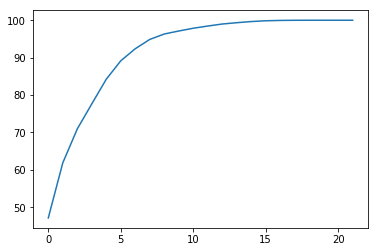

In [88]:
X, y = processed.values, output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
#feature reduction using PCA, estimate how much compoents to be used
pca = PCA(n_components=22)
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print (var1)
plt.plot(var1)
plt.show()

In [113]:
#n_componets can be deduced by observing the graph.
pca = PCA(n_components=18)
pca.fit(processed.values)
X_train_reduced = pca.transform(X_train)

In [110]:
X_train_reduced.shape

(70251, 18)

In [114]:
#n_componets can be deduced by observing the graph.
pca = PCA(n_components=18)
pca.fit(processed.values)
X_test_reduced = pca.transform(X_test)


In [115]:
X_train_reduced = np.reshape(X_train_reduced, (X_train_reduced.shape[0], 1, X_train_reduced.shape[1]))
X_test_reduced = np.reshape(X_test_reduced, (X_test_reduced.shape[0], 1, X_test_reduced.shape[1]))



In [92]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM

In [131]:
# design network
look_back = 3
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(1,18)))
#model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
model.add(Dense(1))
#model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(LSTM(10, input_shape=(1,18)))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')


# fit network
history = model.fit(X_train_reduced, y_train, epochs=10, batch_size=72, validation_data=(X_test_reduced, y_test), verbose=2, shuffle=False)


Train on 70251 samples, validate on 17563 samples
Epoch 1/10
 - 10s - loss: 0.1763 - val_loss: 0.0342
Epoch 2/10
 - 5s - loss: 0.0374 - val_loss: 0.0317
Epoch 3/10
 - 5s - loss: 0.0346 - val_loss: 0.0295
Epoch 4/10
 - 5s - loss: 0.0320 - val_loss: 0.0272
Epoch 5/10
 - 5s - loss: 0.0298 - val_loss: 0.0255
Epoch 6/10
 - 5s - loss: 0.0285 - val_loss: 0.0246
Epoch 7/10
 - 5s - loss: 0.0277 - val_loss: 0.0242
Epoch 8/10
 - 5s - loss: 0.0273 - val_loss: 0.0240
Epoch 9/10
 - 5s - loss: 0.0271 - val_loss: 0.0238
Epoch 10/10
 - 6s - loss: 0.0269 - val_loss: 0.0237


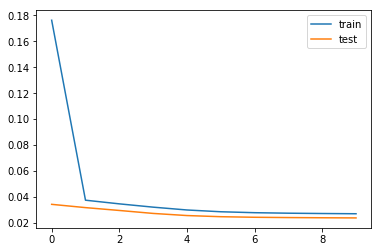

In [132]:
# plot history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [133]:
testPredict = model.predict(X_test_reduced)

In [70]:
len(testPredict)

17563

In [134]:
testPredict[0:1000]

array([[  4.93654399e-04],
       [  1.12613925e-04],
       [  2.20945757e-03],
       [  1.29680775e-04],
       [  3.55251104e-04],
       [  3.01427965e-04],
       [  3.55251104e-04],
       [  4.93654399e-04],
       [  1.06617801e-04],
       [  1.35963070e-04],
       [  5.10989688e-04],
       [  1.12613925e-04],
       [  1.12613925e-04],
       [  8.67273659e-04],
       [  2.33986095e-04],
       [  1.29680775e-04],
       [  1.12613925e-04],
       [  1.46439954e-04],
       [  7.12507904e-01],
       [  4.93654399e-04],
       [  2.20945757e-03],
       [  3.52932693e-04],
       [  1.29680775e-04],
       [  1.59978308e-02],
       [  4.93654399e-04],
       [  1.12613925e-04],
       [  3.52932693e-04],
       [  1.29680775e-04],
       [  1.29680775e-04],
       [  1.12613925e-04],
       [  1.12613925e-04],
       [  1.45745790e-03],
       [  1.22442492e-04],
       [  7.78440561e-04],
       [  1.03956067e-04],
       [  9.61377082e-05],
       [  2.61514122e-03],
 